In [1]:
import pandas 
import matplotlib.pyplot as plt
import seaborn
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data preparation 

In [2]:
dataset_df = pandas.read_csv("datasets/number_of_travelers.csv",sep=",")

In [3]:
# Information sur la DataFrame 

dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       240 non-null    object
 1   passengers  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [4]:
# Présentation des premières lignes 

dataset_df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [5]:
# Verification valeurs manquantes

dataset_df.isna().sum()

month         0
passengers    0
dtype: int64

In [6]:
# Verification des doublons

dataset_df.duplicated().sum()

0

In [7]:
dataset_df['month'] = pandas.to_datetime(dataset_df['month'])

In [8]:
dataset_df["month_name"] = dataset_df["month"].dt.month_name()

In [9]:
dataset_df["index_time"] = numpy.arange(1, len(dataset_df)+1, 1)

In [10]:
dataset_df.head()

,month,passengers,month_name,index_time
0,2000-01-01,46492,January,1
1,2000-02-01,48526,February,2
2,2000-03-01,58764,March,3
3,2000-04-01,56033,April,4
4,2000-05-01,58201,May,5


In [11]:
# créer des variables indicatrices à partir de la colonne "month_name" 

dummies = pandas.get_dummies(dataset_df['month_name'], dtype=int)


In [12]:
dataset_df = pandas.concat([dataset_df, dummies], axis=1)

In [13]:
dataset_df.head()

,month,passengers,month_name,index_time,April,August,December,February,January,July,June,March,May,November,October,September
0,2000-01-01,46492,January,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2000-02-01,48526,February,2,0,0,0,1,0,0,0,0,0,0,0,0
2,2000-03-01,58764,March,3,0,0,0,0,0,0,0,1,0,0,0,0
3,2000-04-01,56033,April,4,1,0,0,0,0,0,0,0,0,0,0,0
4,2000-05-01,58201,May,5,0,0,0,0,0,0,0,0,1,0,0,0


## Normalisation

In [14]:
dataset_mean, dataset_std = dataset_df["passengers"].mean(), dataset_df["passengers"].std()
dataset_df["passengers"] = (dataset_df["passengers"] - dataset_mean)/dataset_std

## Split en train/test

In [15]:
dataset_length = len(dataset_df)
index_split = int(dataset_length*0.75)
train_df = dataset_df[ : index_split]
test_df = dataset_df[index_split: ]

In [16]:
x_train = train_df[['index_time','April', 'August', 'December','February','January','July','June','March','May','November','October','September']].values
y_train = train_df[["passengers"]].values


x_test = test_df[['index_time','April', 'August', 'December','February','January','July','June','March','May','November','October','September']].values
y_test = test_df[["passengers"]].values

## Entrainement


In [17]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [18]:
y_test_predict = model.predict(x_test)
y_train_predict =  model.predict(x_train)


In [19]:
y_train = y_train * dataset_std + dataset_mean
y_test = y_test * dataset_std + dataset_mean

y_train_predict = y_train_predict* dataset_std + dataset_mean
y_test_predict = y_test_predict* dataset_std + dataset_mean


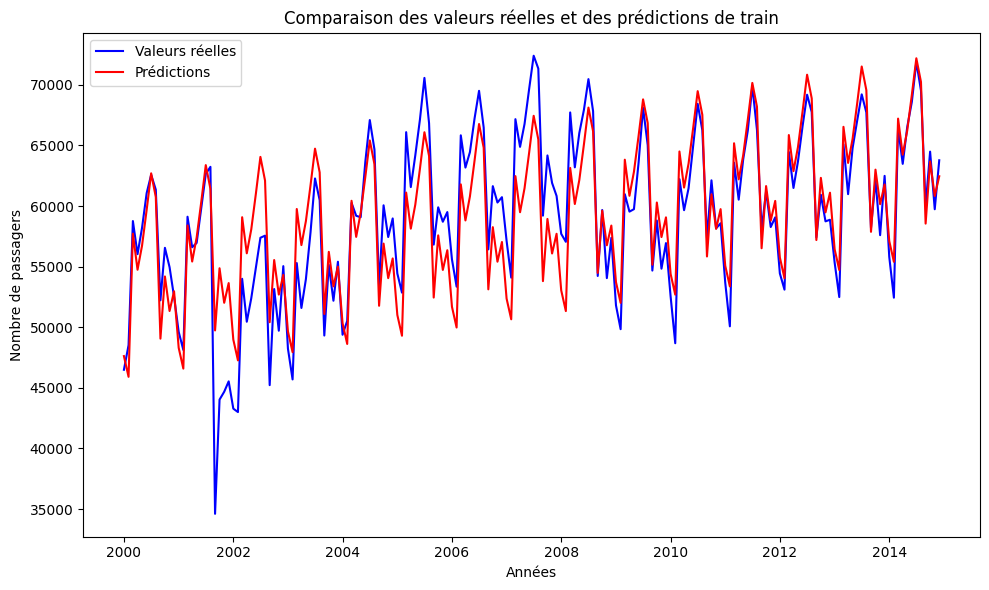

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(train_df["month"], y_train, color='b', label='Valeurs réelles')
plt.plot(train_df["month"], y_train_predict, color='r', label='Prédictions')

plt.xlabel('Années')
plt.ylabel('Nombre de passagers')
plt.title('Comparaison des valeurs réelles et des prédictions de train')

plt.legend()

# Afficher le graphe
plt.tight_layout()
plt.show()

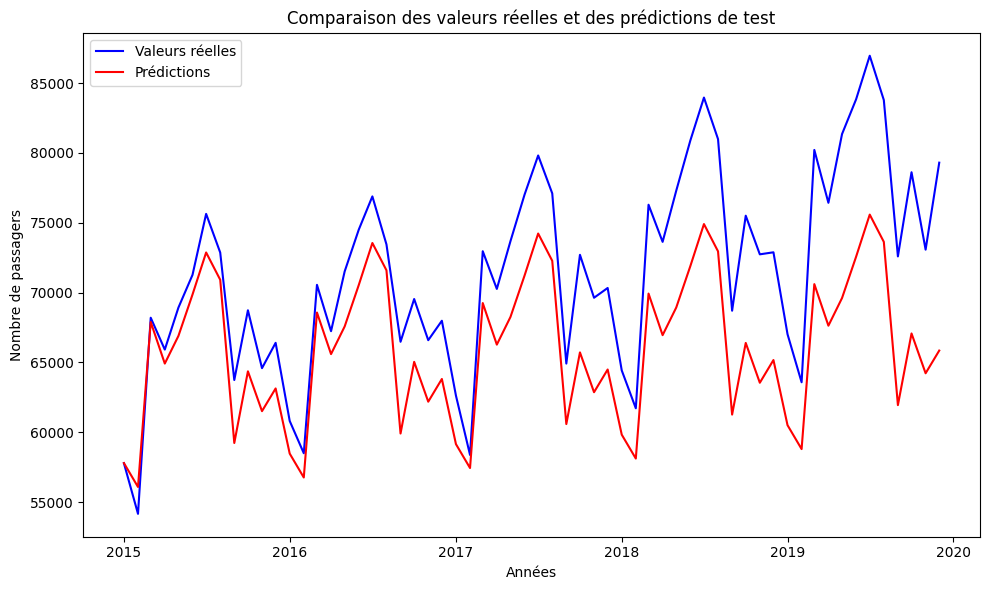

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(test_df["month"], y_test, color='b', label='Valeurs réelles')
plt.plot(test_df["month"], y_test_predict, color='r', label='Prédictions')

plt.xlabel('Années')
plt.ylabel('Nombre de passagers')
plt.title('Comparaison des valeurs réelles et des prédictions de test')

plt.legend()

# Afficher le graphe

plt.tight_layout()
plt.show()